Steps to find the best model that fits Census Income model to predict if Income is more than or Less than $50K annually: 

1) Import Libraries   

In [18]:
#library to load data 
import pandas as pd 
#library for plots
import matplotlib.pyplot as plt
#library to save plots to PDF document
from matplotlib.backends.backend_pdf import PdfPages
#library to divide data into test and train sets
from sklearn.cross_validation import train_test_split
#library to import Decision Tree Classifier
from sklearn import tree
#library to import K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
#library to import SVM Classifier
from sklearn.svm import SVC
#library to import Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
#library to import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#library to show accuracy of Prediction
from sklearn.metrics import accuracy_score
#library to choose Best Classifier model
from sklearn import model_selection

2) Loading data from csv 

In [2]:
inc_df=pd.read_csv('C:\Tania\UCSC_Python\Final Project\Adult.csv')
#Checking Size of data
inc_df.shape

(48842, 15)

In [4]:
#Checking data for Missing Values, Missing Rows of data
inc_df.describe()
#There are no Nan values.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
#Peek at Data
inc_df.head(25)
#shows there are columns with values as ? for some columns

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
#Function to find if there are missing values or Nan values in data
def num_missing(x):
    return sum(x.isnull())
print "Missing Values Per column"
print inc_df.apply(num_missing,axis =0)#axis = 0 means missing columns
print "Missing Values Per row"
print inc_df.apply(num_missing,axis = 1).head(1)

Missing Values Per column
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
Missing Values Per row
0    0
dtype: int64


3) Analyze data

In [7]:
#Confirming columns of data
inc_df.columns
'''Numeric features are : age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week 
while 
Categorical features are : workclass, education, marital-status, occupation, relationship, race, gender, native-country
Label or Attribute to be Predicted is income'''

'Numeric features are : age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week \nwhile \nCategorical features are : workclass, education, marital-status, occupation, relationship, race, gender, native-country\nLabel or Attribute to be Predicted is income'

Using Matplotlib to do analysis and figure out if to exclude any data, and explore relationships between the various Numeric and Categoric Features.

Saving the graphs to Income_Analysis.pdf document in current directory for analysis.

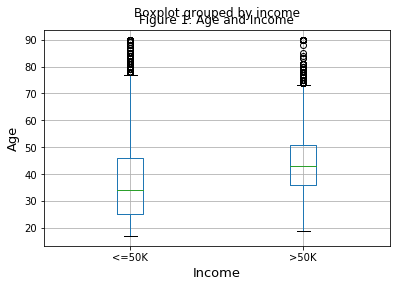

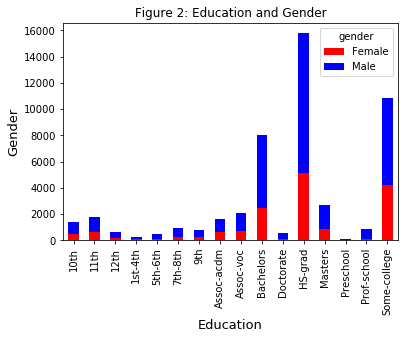

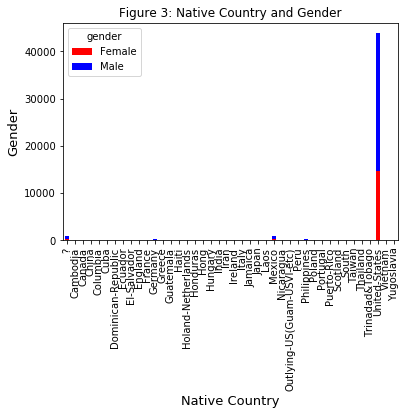

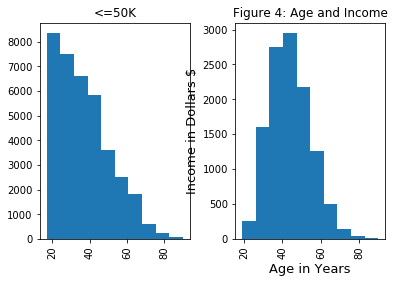

In [9]:
pp=PdfPages('Income_Analysis.pdf')
inc_df.boxplot("age","income")
'''Conclude from Boxplot that Between Age group 35-50 persons earn more than $50K.
Younger Age group 25-35 earn less than $50K.
About 50% of Middle age group with Ages between 35-45 earn more than 50K and persons with Ages less than 35 earn Less thna $50K.'''
plt.title('Figure 1: Age and Income')
plt.xlabel('Income', fontsize = 13)
plt.ylabel('Age', fontsize = 13)
plt.savefig(pp,format='pdf',bbox_inches='tight')
plt.show()
Ed_Gender = pd.crosstab(inc_df['education'], inc_df['gender'])
Ed_Gender.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
'''Conclude from graph that Men get an opportunity to study and pursue higher studies as compared to Women
There are more dropouts after High School with both lesser numbers of Bachelors Degree completion'''
plt.title('Figure 2: Education and Gender')
plt.xlabel('Education', fontsize = 13)
plt.ylabel('Gender', fontsize = 13)
plt.savefig(pp,format='pdf',bbox_inches='tight')
plt.show()
Gen_NatCountry = pd.crosstab(inc_df['native-country'], inc_df['gender'])
Gen_NatCountry.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
'''Conclude from graph that the Census Income data has been collected mostly from US with ~ a third of women and rest men'''
plt.title('Figure 3: Native Country and Gender')
plt.xlabel('Native Country', fontsize = 13)
plt.ylabel('Gender', fontsize = 13)
plt.savefig(pp,format='pdf',bbox_inches='tight')
plt.show()
inc_df.hist("age","income")
'''Conclude from histogram that Age group between 35 and 55 earns more than $50K annually while Age group between 20 and 35 
earn less than $50K annually'''
plt.title('Figure 4: Age and Income')
plt.xlabel('Age in Years', fontsize = 13)
plt.ylabel('Income in Dollars $', fontsize = 13)
plt.savefig(pp,format='pdf',bbox_inches='tight')
plt.show()
pp.close()
# All graphs saved in pdf file

In [10]:
# Analysis to find columns with undefined (?) missing for attribute Workclass values
inc_df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
# Analysis to find columns with undefined (?) missing for attribute Occupation values
inc_df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
# Analysis to find columns with undefined (?) missing for attribute Native-country values
inc_df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

In [13]:
'''Dropping data with undefined (?) missing values for columns Workclass, Occupation and Native-country 
to ensure missing data is not used for analysis'''
inc_df_clean = inc_df[(inc_df["workclass"]!= "?")&(inc_df["occupation"]!= "?")&(inc_df["native-country"]!="?")]
# Peeking at data to confirm all values with ? values are not present as seen previously
inc_df_clean.head(25)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [14]:
# Analysing Marital status column of data
inc_df["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

4) Feature Engineering : 

Replacing Marital-status column with values as Single or Married, based on marital status. Values ['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'] given value of 'Married', while ['Never-married','Divorced','Separated','Widowed'] given value of 'Single' for simplicity.

In [15]:
inc_df_clean['marital-status-SM']= inc_df['marital-status'].replace(['Married-civ-spouse','Never-married','Divorced','Separated','Widowed','Married-spouse-absent','Married-AF-spouse'],
                     ['Married','Single','Single','Single','Single','Married','Married'])

C:\Users\sraba\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
# Checking values of Single and Married values to get an idea of the data
inc_df_clean['marital-status-SM'].value_counts()

Single     23583
Married    21639
Name: marital-status-SM, dtype: int64

In [17]:
inc_df_clean.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'educational-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'gender',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income', u'marital-status-SM'],
      dtype='object')

In [18]:
#Feature Engineering : Converting Gender column with values as 0 for Male and 1 for Female
inc_df_clean['genderMF']= inc_df_clean["gender"].map({"Male":0,"Female": 1})

C:\Users\sraba\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
inc_df_clean.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status-SM,genderMF
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Single,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Married,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Married,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Married,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,Single,0


In [20]:
#Feature Engineering : Converting modified Marital status column with values as 0 for Single and 1 for Married
inc_df_clean['marital-statusSM']= inc_df_clean["marital-status-SM"].map({"Single":0,"Married": 1})
# Convert Sex value to 0 and 1
inc_df_clean.head(5)

C:\Users\sraba\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,marital-status-SM,genderMF,marital-statusSM
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Single,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Married,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Married,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Married,0,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,Single,0,0


In [21]:
inc_df_clean.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'educational-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'gender',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income', u'marital-status-SM', u'genderMF', u'marital-statusSM'],
      dtype='object')

In [22]:
#Using List Comprehension to convert Label Income to numeric value, as a Project criteria
#Can do the same using Python module sklearn.preprocessing LabelEncoder instance
labels=inc_df_clean['income'].map({'<=50K': 0, '>50K': 1})
labels.head(5)

0    0
1    0
2    1
3    1
5    0
Name: income, dtype: int64

In [23]:
# Dropping the data to get rid of numeric and categoric attributes don't want to use as features to predict label
inc_df_clean.drop(labels=["workclass",'fnlwgt','education','marital-status',"occupation","relationship","race",
                          "gender",'capital-gain','capital-loss',"native-country",'income','marital-status-SM'], axis = 1, inplace = True)

C:\Users\sraba\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [24]:
print('Dataset with Unwanted Features and Labels removed')
inc_df_clean.head(10)

Dataset with Dropped Labels


,age,educational-num,hours-per-week,genderMF,marital-statusSM
0,25,7,40,0,0
1,38,9,50,0,1
2,28,12,40,0,1
3,44,10,40,0,1
5,34,6,30,0,0
7,63,15,32,0,1
8,24,10,40,1,0
9,55,4,10,0,1
10,65,9,40,0,1
11,36,13,40,0,1


In [25]:
# Peeking dataframe to check for features columns
inc_df_clean.columns

Index([u'age', u'educational-num', u'hours-per-week', u'genderMF',
       u'marital-statusSM'],
      dtype='object')

In [26]:
inc_df_clean.head(5)

,age,educational-num,hours-per-week,genderMF,marital-statusSM
0,25,7,40,0,0
1,38,9,50,0,1
2,28,12,40,0,1
3,44,10,40,0,1
5,34,6,30,0,0


In [31]:
inc_df_clean.tail(5)

,age,educational-num,hours-per-week,genderMF,marital-statusSM
48837,27,12,38,1,1
48838,40,9,40,0,1
48839,58,9,40,1,0
48840,22,9,20,0,0
48841,52,9,40,1,1


In [28]:
# Features dataframe created
features = inc_df_clean
features.head()

,age,educational-num,hours-per-week,genderMF,marital-statusSM
0,25,7,40,0,0
1,38,9,50,0,1
2,28,12,40,0,1
3,44,10,40,0,1
5,34,6,30,0,0


In [32]:
inc_df_clean.tail(5)

,age,educational-num,hours-per-week,genderMF,marital-statusSM
48837,27,12,38,1,1
48838,40,9,40,0,1
48839,58,9,40,1,0
48840,22,9,20,0,0
48841,52,9,40,1,1


In [33]:
features.tail(5)

,age,educational-num,hours-per-week,genderMF,marital-statusSM
48837,27,12,38,1,1
48838,40,9,40,0,1
48839,58,9,40,1,0
48840,22,9,20,0,0
48841,52,9,40,1,1


In [34]:
labels.tail(5)

48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, dtype: int64

5) Modelling - using different models to find which model works best.

In this implementation, checking for Decision Tree Classifier, K Neighbors Classifier, SVM Classifier, Random Forest Classifier and Logistic Regression Classifier.

In [36]:
# Assigning Features and Labels dataset to Machine Learning terminology datasets
X=features
y=labels

In [37]:
#Peeking Features dataset to confirm matching rowcounts & values with Adult.csv
X.tail(5)

,age,educational-num,hours-per-week,genderMF,marital-statusSM
48837,27,12,38,1,1
48838,40,9,40,0,1
48839,58,9,40,1,0
48840,22,9,20,0,0
48841,52,9,40,1,1


In [38]:
#Peeking Label dataset to confirm matching rowcounts & values with Adult.csv
labels.tail(5)

48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, dtype: int64

In [85]:
#Creating Dictionary with Key as Classifier name and Value as Accuracy Score for Classifier
dic_classacc={}
# Defining Train and Test datasets with 80% Train and 20% Test
X_train,X_test,y_train,y_test = train_test_split (X, y, test_size = 0.2)

In [89]:
#Implementing Decision Tree Classifier
cdt = tree.DecisionTreeClassifier()
#Fitting the Train Features & Labels data to Decision Tree Classifier
cdt.fit(X_train,y_train)
#Predicting Test labels from Test data
predictions_dt = cdt.predict(X_test)
#Showing accuracy of Prediction
print "Accuracy of Test data using Decision Tree Classifier is : ",accuracy_score (y_test, predictions_dt)
acc_dt = accuracy_score (y_test, predictions_dt)
dic_classacc['Decision Tree']= '%0.2f'%acc_dt
print dic_classacc

Accuracy of Test data using Decision Tree Classifier is :  0.794140409066
{'Decision Tree': '0.79'}


In [91]:
#Implementing K Neighbors Classifier
knc = KNeighborsClassifier()
#Fitting the Train Features & Labels data to K Neighbors Classifier
knc.fit(X_train,y_train)
#Predicting Test labels from Test data
predictions_kn=knc.predict(X_test)
#Showing accuracy of Prediction
print "Accuracy of Test data using K Neighbors Classifier is : ",accuracy_score (y_test, predictions_kn)
acc_knc = accuracy_score (y_test, predictions_kn)
dic_classacc['K Neighbors']= '%0.2f'%acc_knc
print dic_classacc

Accuracy of Test data using K Neighbors Classifier is :  0.800884466556
{'K Neighbors': '0.80', 'Decision Tree': '0.79'}


In [94]:
#Implementing SVM Classifier
svc = SVC()
#Fitting the Train Features & Labels data to SVM Classifier
svc.fit(X_train,y_train)
#Predicting Test labels from Test data
predictions_svc=svc.predict(X_test)
#Showing accuracy of Prediction
print "Accuracy of Test data using SVM Classifier is : ",accuracy_score(y_test,predictions_svc)
acc_svc = accuracy_score (y_test, predictions_svc)
dic_classacc['SVC']= '%0.2f'%acc_svc
print dic_classacc

Accuracy of Test data using SVM Classifier is :  0.82034273079
{'K Neighbors': '0.80', 'SVC': '0.82', 'Decision Tree': '0.79'}


In [96]:
# Implementing Random Forest Classifier
ranfor = RandomForestClassifier()
#Fitting the Train Features & Labels data to Random Forest Classifier
ranfor.fit(X_train, y_train)
#Predicting Test labels from Test data
predictions_rf = ranfor.predict(X_test)
print 'The accuracy of the Random Forest Model is', accuracy_score(y_test,predictions_rf)
acc_rf = accuracy_score (y_test, predictions_rf)
dic_classacc['Random Forest']= '%0.2f'%acc_rf
print dic_classacc

The accuracy of the Random Forest Model is 0.803427307905
{'Random Forest': '0.80', 'K Neighbors': '0.80', 'SVC': '0.82', 'Decision Tree': '0.79'}


In [135]:
#Implementing Logistic Regression Classifier
lr= LogisticRegression()
#Fitting the Train Features & Labels data to Logistic regression Classifier
lr.fit(X_train, y_train)
#Predicting Test labels from Test data
predictions_lr=lr.predict(X_test)
#Showing accuracy of Prediction
print "Accuracy of Test data using Logistic Regression Classifier is : ",accuracy_score(y_test,predictions_lr)
acc_lr = accuracy_score (y_test, predictions_lr)
dic_classacc['Logistic Regression']= '%0.2f'%acc_lr
print dic_classacc

Accuracy of Test data using Logistic Regression Classifier is :  0.819568822554
{'Random Forest': '0.80', 'Logistic Regression': '0.82', 'K Neighbors': '0.80', 'SVC': '0.82', 'Decision Tree': '0.79'}


6) Choosing the best model that fits tha data



In [141]:
for k,v in dic_classacc.iteritems():
    kl = dic_classacc.keys()
    kv = dic_classacc.values()
print kl
print kv
res=[key for key,val in dic_classacc.iteritems() if val == max(dic_classacc.values())]
print 'Algorithm that is most efficient is ', res
'''Since SVC and Logistic Regression are both jointly good, will use Logistic Regression, 
since simpler model and takes lesser time for processing.
Implementing using sklearn.model_selection takes a long time as compared to this method'''

['Random Forest', 'Logistic Regression', 'K Neighbors', 'SVC', 'Decision Tree']
['0.80', '0.82', '0.80', '0.82', '0.79']
Algorithm that is most efficient is  ['Logistic Regression', 'SVC']


'Since SVC and Logistic Regression are both jointly good, will use Logistic Regression, \nsince simpler model and takes lesser time for processing.\nImplementing using sklearn.model_selection takes a long time as compared to this method'

In [ ]:
# Prepare configuration for cross validation testing 
seed = 7
# Prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
# boxplot Algorithm Comparison
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.title('Figure 5 : Algorithm Comparison')
plt.xlabel('Classifier', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
plt.savefig(pp,format='pdf',bbox_inches='tight')
plt.show()
pp.close()